<a id="topo"></a>
___
<img src="../_images/logo_mei.jpg" alt="Mestrado em Internet das Coisas @ IPT" width="200"/>
<div class="alert alert-block alert-success" align="center">
<h1>Análise e Processamento de Grandes Volumes de Dados</h1>
<h3>Sentiment analysis - 2ª parte</div>
<center><h5>Criado por: Bruno Bernardo / David Carrilho / Rui Rodrigues</h5></center>
___

[<img src="../_images/download.jpg" alt="Mestrado em Internet das Coisas @ IPT" width="50"/>](Twitter Sentiment Analysis.ipynb)
___

[Análise sentimental no Twitter](#twitter)<br>
[Preparação](#preparacao)<br>
[Importação](#import)<br>
[Autenticação](#auth)<br>
[Parâmetros](#def)<br>
[Pesquisa](#search)<br>
[Resultados individuais](#resi)<br>
[Sentimento generalizado](#rest)

<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

<a id="twitter"></a>
# Análise sentimental no Twitter
<p>&nbsp;</p>

As redes sociais são a maior fonte de informação e categorização. Os utentes/matéria prima destas redes tanto expressam as suas opiniões como categorizam, pela emoção que sentem, as opiniões de outros sobre uma infinidade de assuntos.

Faz todo o sentido explorar esta fonte infindável de informação.

Neste exercício vamos demonstrar como aceder a feeds do Twitter e deles extrair informação sentimental.


------

<a id="preparacao"></a>
## Preparação

Se correr o notebook no seu próprio server Jupyter deverá instalar dependências.

Na "Anaconda Comand Prompt" (na pasta onde tens os notebooks):

    pip install tweepy

    pip install textblob

<div class="alert alert-block alert-info">NOTA: Se não tiveres premissões para instalar, executa o Prompt como Administrador. Se estiveres da drive C: e os notebooks estiverem na D:, assim que abres o Prompt deves escrever D: para mudar de drive.</div>

No nosso caso vamos usar um contentor dinâmico que permite a partilha de notebooks com edição, [mybinder.org](https://mybinder.org).

<p>&nbsp;</p>

<a id="import"></a>
### A importação dos módulos necessários

In [159]:
import tweepy
from textblob import TextBlob

In [160]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

<a id="auth"></a>
### Autenticação à API do Twitter

In [161]:
consumer_key= 'nEiGfOnHr3hcIgQ0k08kG19q2'
consumer_secret= 'tnbh1kfHYFff3PS0c6AjXlPqYvL2lJG8wdej5HZvpqvDH6Ybfr'

access_token='776640421-r3L3A1YaiMGlJrqlPE08wCInKIIvzN2WoxsyLMZx'
access_token_secret='vDNBDiLyLeu0IcjylH7liqpzW8OM5sohNSdl9MsVnjeok'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

<a id="def"></a>
### Definição de parâmetros de pesquisa

In [162]:
query = 'crypto'
max_tweets = 100
lang = 'en'


<a id="search"></a>
### Efectuar pesquisa

Devido a limites nas pesquisas vamos usar um mecanismo para obter os twetts em parcelas até termos o total definido:

In [163]:
public_tweets = []
last_id = -1
while len(public_tweets) < max_tweets:
    count = max_tweets - len(public_tweets)
    try:
        new_tweets = api.search(q=query, count=count, max_id=str(last_id - 1), lang='en')
        if not new_tweets:
            break
        public_tweets.extend(new_tweets)
        last_id = new_tweets[-1].id
    except tweepy.TweepError as e:
        # depending on TweepError.code, one may want to retry or wait
        # to keep things simple, we will give up on an error
        break

<a id="resi"></a>
### Resultados Individuais

Agora vamos excluir dos tweets obtidos todos aqueles que são retweets e hyperlinks do conteúdo dos que sobram. Seguidamente imprimimos os tweets, a análise sentimental e respectivo emoticon.

1/100
@Tronfoundation @justinsuntron First
Sentiment(polarity=0.25, subjectivity=0.3333333333333333)



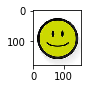

2/100
#xlm 🔥🔥🔥🚀🚀🚀📈💸  see ya @ 1.6 $ boys...
#crypto #cryptocurrency #tron #trx #miota #iota #xvg #litecoin #bitcoin… 
Sentiment(polarity=0.0, subjectivity=0.0)



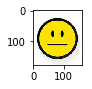

3/100
@Bmann283 @justinsuntron Look at the market... Tell me one crypto other than ether that isn't bleeding.
Sentiment(polarity=-0.125, subjectivity=0.375)



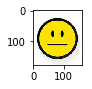

4/100
@Riana_Crypto I have a perfect solution for the FBI director, but it will require π to be exactly 3. But I'm sure t… 
Sentiment(polarity=0.5833333333333334, subjectivity=0.7129629629629629)



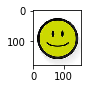

5/100
Next-Generation Crypto Trading Platform Gimmer Announces Token Sale - PR Newswire (press release)… 
Sentiment(polarity=0.0, subjectivity=0.0)



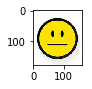

6/100
Wednesday is here and its mayhem some really awesome deals to be had. Enjoy crypto investing get in before friday


Sentiment(polarity=0.7, subjectivity=0.75)



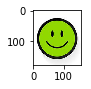

7/100
Kodak Surges After Announcing Plans to Launch Cryptocurrency Called 'Kodakcoin' 
Sentiment(polarity=0.0, subjectivity=0.0)



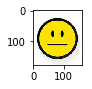

8/100
Riot Blockchain: This Crypto Clown Car Continues Hurtling Toward ... - Seeking Alpha  via @blockchainbiz #crypto
Sentiment(polarity=0.0, subjectivity=0.0)



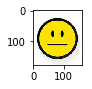

9/100
Blockchain technology and cryptocurrencies. Hm, that rings a bell (from 2015) 
Sentiment(polarity=0.0, subjectivity=0.0)



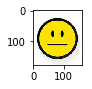

10/100
#Betrium launches Pre-#ICO, Worldwide Bookmaker and #Betting #Exchange - @NEWSBTC #fintech #blockchain #crypto 
Sentiment(polarity=0.0, subjectivity=0.0)



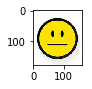

11/100
New on Binance: VIBE - Thoughts?  #CryptoMarkets #crypto #cryptocurrency #blockchain #reddit
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)



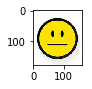

12/100
SHAREHOLDER ALERT: Levi &amp; Korsinsky, LLP Notifies Shareholders of The Crypto Company of a Class Action ... - GlobeN… 
Sentiment(polarity=0.1, subjectivity=0.1)



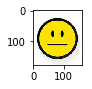

13/100
Kodak Surges After Announcing Plans to Launch #Cryptocurrency Called 'Kodakcoin'  #digital… 
Sentiment(polarity=0.0, subjectivity=0.0)



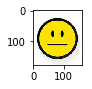

14/100
@Crypto_knight72 Yeah it would, anyway its their call.
Sentiment(polarity=0.0, subjectivity=0.0)



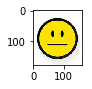

15/100
Amid all the speculations/downfall in the international market, the investors are buying more and more crypto curre… 
Sentiment(polarity=0.3333333333333333, subjectivity=0.3333333333333333)



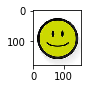

16/100
Crypto currency trade is the in-thing - SowetanLIVE Sunday Wolrd  via @blockchainbiz #crypto
Sentiment(polarity=0.0, subjectivity=0.0)



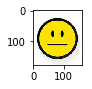

17/100
@BestTubaHorse @AgrippaTheGr8 Crypto mining isn't as big here, most likely because Australian Internet speeds are s… 
Sentiment(polarity=0.125, subjectivity=0.4)



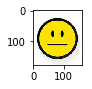

18/100
@crypto_lord1 I don’t claim this 🔥 ass meme. But I def support it
Sentiment(polarity=0.0, subjectivity=0.0)



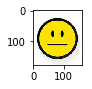

19/100
Ethereum co-founder predicts #crypto crash, then consolidation - EJ Insight  via @blockchainbiz #crypto
Sentiment(polarity=0.0, subjectivity=0.0)



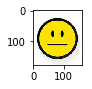

20/100
@Crypto_goat_ Ripple is real technology.. it has great future.. 

I believe.. and im buying more and more.. as it goes down..
Sentiment(polarity=0.3074074074074074, subjectivity=0.4106481481481481)



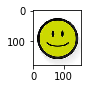

21/100
There are no safe crypto exchanges. None. Zero.
Sentiment(polarity=-0.25, subjectivity=0.5)



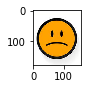

22/100
✅Binance
❌Poloniex
❌Bittrex

Move your trading to the #1 crypto exchange today! 🚀

Receive a 50% discount on tradin… 
Sentiment(polarity=0.0, subjectivity=0.0)



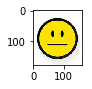

23/100
Hey Crypto Valley! Come to the TechCrunch Zug Meetup, January ... - TechCrunch  via @blockchainbiz #crypto
Sentiment(polarity=0.0, subjectivity=0.0)



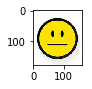

24/100
Nvidia Curbs Data Center GPU Use – But Crypto Miners Are ... - CoinDesk  via @blockchainbiz #crypto
Sentiment(polarity=-0.1, subjectivity=0.1)



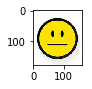

25/100
Eagle Token is here! Join our ERC20 airdrop. Fill the form to join Airdrop Round #1
 …… 
Sentiment(polarity=-0.2, subjectivity=0.4)



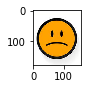

26/100
@Riana_Crypto Once again missing the point, there is no way for maths to know when a valid warrant is issued, so th… 
Sentiment(polarity=-0.2, subjectivity=0.05)



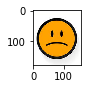

27/100
'Hodl' Everything or Take Profits on Crypto Gains? | News ... - Cointelegraph (Bitcoin, Cryptocurrency and Blockcha… 
Sentiment(polarity=0.0, subjectivity=0.0)



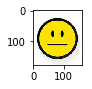

28/100
A mammoth, underlying the market. Soon to grow and dominate. Still can't understand why more are yet to know about… 
Sentiment(polarity=0.5, subjectivity=0.5)



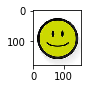

29/100
@Kl65680223 @justinsuntron @Tronfoundation @TronCommunity @crypto_sarah9 Funny
Sentiment(polarity=0.25, subjectivity=1.0)



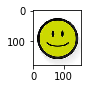

30/100
Shouting Crypto in a Crowded Theater - Bloomberg  via @blockchainbiz #crypto
Sentiment(polarity=0.0, subjectivity=0.0)



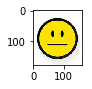

31/100
@Eagle_Token Eagle Token is here! Join our ERC20 airdrop. Fill the form to join Airdrop Round #1… 
Sentiment(polarity=-0.2, subjectivity=0.4)



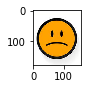

32/100
JPMorgan CEO Makes Unclear Statements On Bitcoin and G ... - Cointelegraph (Bitcoin, Cryptocurrency and Blockchain… 
Sentiment(polarity=0.0, subjectivity=0.0)



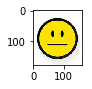

33/100
RT zebpay "papu22 We have replied you on the ticket submitted by you. Please check your email address associated with Zebpay. Thank you."
Sentiment(polarity=0.0, subjectivity=0.0)



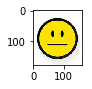

34/100
@JennyTinny @crypto_k_robert I dunno why, I think there is something super shady about this guy. I’m holding, but s… 
Sentiment(polarity=0.04166666666666666, subjectivity=0.6458333333333333)



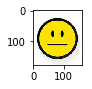

35/100
✅Binance
❌Poloniex
❌Bittrex

Move your trading to the #1 crypto exchange today! 🚀

Receive a 50% discount on tradin… 
Sentiment(polarity=0.0, subjectivity=0.0)



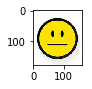

36/100
I been looking at #NLG for a while.. small supply solid patterns, great product, pre 2015 coin.. I have seen solid… 
Sentiment(polarity=0.18333333333333335, subjectivity=0.4166666666666667)



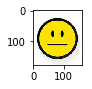

37/100
Kodak's pivot to #crypto seems to be working out quite nicely - Fast Company  via @blockchainbiz #crypto
Sentiment(polarity=0.2, subjectivity=0.6)



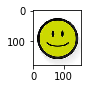

38/100
@WhalePanda @Overstock Any other places this works 😈
Sentiment(polarity=-0.125, subjectivity=0.375)



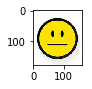

39/100
Report: South Korea Eyes Joint Crypto Regulations With China, Japan - Coindesk  via @blockchainbiz #crypto
Sentiment(polarity=0.0, subjectivity=0.0)



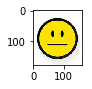

40/100
Crypto experience at its finest



@buddyzle @sealzy1 @drizzworld @vixitkach
Sentiment(polarity=0.0, subjectivity=0.0)



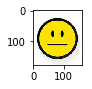

41/100
@RyanFarroki @Brad2pointO @justinsuntron @netflix Ledger you say, I’m worried about when they leave the ETH network… 
Sentiment(polarity=0.0, subjectivity=0.0)



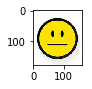

42/100
@Eclectic_Crypto We aren’t looking to make offspring don’t get technical.
Sentiment(polarity=0.0, subjectivity=0.1)



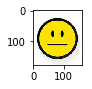

43/100
Register #Upcoin new crypto exchange and get free 500$. Don't miss the opportunity.

-&gt; 

$HSR $KMD $ARK $REP
Sentiment(polarity=0.2681818181818182, subjectivity=0.6272727272727273)



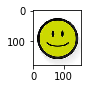

44/100
NFL superstar Richard Sherman lays out 3 issues with #crypto trading - Business Insider  via @blockchainbiz #crypto
Sentiment(polarity=0.0, subjectivity=0.0)



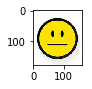

45/100
honestly i made my first bucks on $XRP but now that shit is terrible. it's a bunch of 30-60 year olds that think XR… 
Sentiment(polarity=-0.08750000000000002, subjectivity=0.7583333333333333)



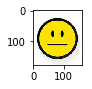

46/100
Hedge fund star Mike Novogratz is starting a #crypto version of Goldman Sachs - The Australian Financial Review… 
Sentiment(polarity=0.0, subjectivity=0.03333333333333333)



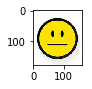

47/100
The Best #Bitcoin #CryptoWallet To Store Funds! (Safe &amp; Secure) 
Sentiment(polarity=0.6333333333333333, subjectivity=0.4666666666666666)



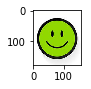

48/100
ICO Investment for Beginners (Step-by-Step) -  #bitcoin #crypto 
Sentiment(polarity=0.0, subjectivity=0.0)



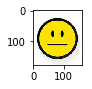

49/100
First global art provenance platform #ARTEX initiated a #crowdsale - @NEWSBTC #ICO #token #tokensale #crypto 
Sentiment(polarity=0.125, subjectivity=0.16666666666666666)



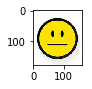

50/100
Crypto is bleeding not just $xvg and $trx, relax people are so impatient it’s petty. The new wave in crypto makes t… 
Sentiment(polarity=-0.03181818181818183, subjectivity=0.6772727272727272)



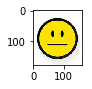

51/100
People visiting my house unannounced to ask me about crypto and talk about their shitcoin hodl is becoming a daily thing.
Sentiment(polarity=0.225, subjectivity=0.42500000000000004)



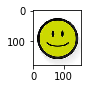

52/100
Ain’t no autopilot in the crypto gains except sitting on your ass n watching mewn
Sentiment(polarity=0.0, subjectivity=0.0)



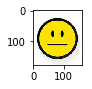

53/100
With the latest news with $TRX are we going to break this downtrend? Check out  to get trade… 
Sentiment(polarity=0.5, subjectivity=0.9)



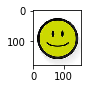

54/100
@Yorkyor30444439 The volume would be nice right now
Sentiment(polarity=0.44285714285714284, subjectivity=0.7678571428571428)



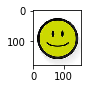

55/100
@Top500Crypto I have heard of this "decision making" before but just thought it was FUD.
Sentiment(polarity=0.0, subjectivity=0.0)



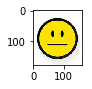

56/100
@justinsuntron @Tronfoundation What about the NASDAQ partnership, is it coming anytime soon?
Sentiment(polarity=0.0, subjectivity=0.0)



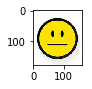

57/100
LIFEtoken_: RT hitbtc: ETH updates! Meet dynamic ETH fee for withdrawals. Transactions will be rapid regardless of… 
Sentiment(polarity=0.0, subjectivity=0.16666666666666666)



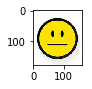

In [164]:
count=0
totalPol=0
totalSub=0

for tweet in public_tweets:
    # Excluir retweets
    if (not tweet.retweeted) and ('RT @' not in tweet.text):
        # Remover Sites dos Tweets
        text = re.sub(r'http\S+', '', tweet.text, flags=re.MULTILINE)
        print(str(count+1)+'/'+str(len(public_tweets)))
        print(text)

        #Executar Analise Sentimental no Tweet
        analysis = TextBlob(text)

        #Auxiliares para Resultados Totais
        count +=1
        totalPol += analysis.sentiment.polarity
        totalSub += analysis.sentiment.subjectivity

        print(analysis.sentiment)
        print("")
        plt.figure(figsize=(1,1))
        # plot emoticon
        if analysis.sentiment.polarity > 0.6:
            img=mpimg.imread('../_images/awesome.jpg')
            imgplot = plt.imshow(img)
            plt.show()
        if 0.20 <= analysis.sentiment.polarity <= 0.6:
            img=mpimg.imread('../_images/good.jpg')
            imgplot = plt.imshow(img)
            plt.show()
        if -0.20 < analysis.sentiment.polarity < 0.2:
            img=mpimg.imread('../_images/neutral.jpg')
            imgplot = plt.imshow(img)
            plt.show()
        if -0.60 <= analysis.sentiment.polarity <= -0.2:
            img=mpimg.imread('../_images/bad.jpg')
            imgplot = plt.imshow(img)
            plt.show()
        if analysis.sentiment.polarity < -0.6:
            img=mpimg.imread('../_images/horrible.jpg')
            imgplot = plt.imshow(img)
            plt.show()

        

<a id="rest"></a>
### Resultados Totais

Fazendo uma simples média aritmética tentamos estimar de forma rude o sentimento geral sobre o alvo da nossa pesquisa:

Polaridade: 0.08
Subjetividade : 0.24


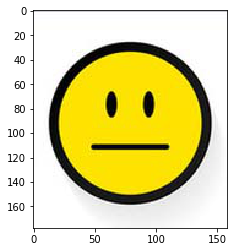

In [165]:
polaridadeTotal = (totalPol/count)
subjetividadeTotal = (totalSub/count)

print("Polaridade: "+"{:.2}".format(polaridadeTotal));
print("Subjetividade : "+"{:.2}".format(subjetividadeTotal ));

if polaridadeTotal > 0.6:
    img=mpimg.imread('../_images/awesome.jpg')
    imgplot = plt.imshow(img)
    plt.show()
if 0.20 <= polaridadeTotal <= 0.6:
    img=mpimg.imread('../_images/good.jpg')
    imgplot = plt.imshow(img)
    plt.show()
if -0.20 < polaridadeTotal < 0.2:
    img=mpimg.imread('../_images/neutral.jpg')
    imgplot = plt.imshow(img)
    plt.show()
if -0.60 <= polaridadeTotal <= -0.2:
    img=mpimg.imread('../_images/bad.jpg')
    imgplot = plt.imshow(img)
    plt.show()
if polaridadeTotal < -0.6:
    img=mpimg.imread('../_images/horrible.jpg')
    imgplot = plt.imshow(img)
    plt.show()

[<div align="right" class="alert alert-block"><img src="../_images/top.png" width="20"></div>](#topo)

### Ref.

https://youtu.be/o_OZdbCzHUA

https://github.com/llSourcell/twitter_sentiment_challenge

https://github.com/kalradivyanshu/TwitterSentiment

http://docs.tweepy.org/en/v3.5.0/api.html
